###  First bit plots distributions as samples which isn't used any more
###  Later cells do the Hebb Bayesian filter versus simple exponential decay and saves them as hebb_samples_figure2A.png  and hebb_samples_figure2B.png

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

decay = 0.7
sigma = 1.0

[ 146  210  263 ... 9606 9634 9837]
10000
[0. 0. 0. ... 0. 0. 0.]


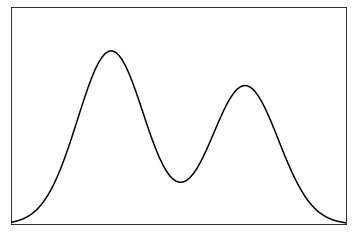

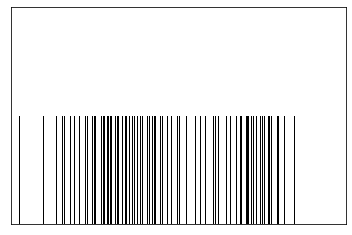

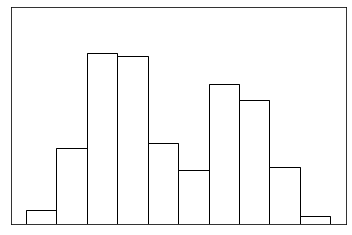

<Figure size 432x288 with 0 Axes>

In [2]:
sigma = 1
mu = 0
decay = 0.8
x_length = 100
multiplier = 100
x = np.linspace(mu - 5*sigma, mu + 15*sigma, x_length)
x = np.linspace(0,10,x_length)
posns = np.array([0,1,2,3,4])
#labels = ('1','2','3','4','5')
labels = ('A','B','C','D','E')
label_arr = ['A','B','C','D','E']
plt.xticks([], [])
plt.yticks([],[])
#plt.xticks(posns, labels)

#print(x)
distribution = (stats.norm.pdf(x, mu + 3 , sigma) + (stats.norm.pdf(x, mu + 7, sigma)) * 0.8)


#print(len(distribution))

plt.ylim((0,0.5))
plt.xlim(0,10.0)

#plt.plot(x, stats.norm.pdf(x, mu, sigma), 'k-')
#plt.plot(x, (stats.norm.pdf(x, mu + 2, sigma))/2, 'k-')
plt.plot(x, distribution, 'k-')

plt.figure()
#

distribution /= distribution.sum() # make sum to 1
distribution_long = np.zeros(x_length * multiplier)
for i in range(len(distribution)):
    for j in range(multiplier ):
        distribution_long[multiplier  * i + j] = distribution[i]
        
distribution_long /= distribution_long.sum() # make sum to 1
indexes = np.random.choice(x_length * multiplier , 3500,True,p=distribution_long)
print(np.sort(indexes))

y = np.zeros(x_length * multiplier )
for i in indexes:
    y[i] = 1.0
print(len(y))
print(y)

plt.xticks([], [])
plt.yticks([],[])
#plt.bar(np.arange(len(x)),y, color='black')
plt.ylim((0,2.0))
plt.xlim(0,x_length * multiplier )
plt.bar(np.arange(len(y)),y, color='black')
plt.figure()

plt.xticks([], [])
plt.yticks([],[])
plt.ylim((0,850))
plt.hist(indexes,color='white',edgecolor='black')
plt.figure()
plt.show()

x = x points
mu = mean
sigma
to_plot = the array to plot up to here
initial_y_offset = y value to start the first line from

y_offset_step = decrement for each successive trial line

## Hebb Bayesian filter versus simple exponential decay. Saves them as hebb_samples_figure2A.png and hebb_samples_figure2B.png. Need to save images to file to get adequate resolution


exponential decay

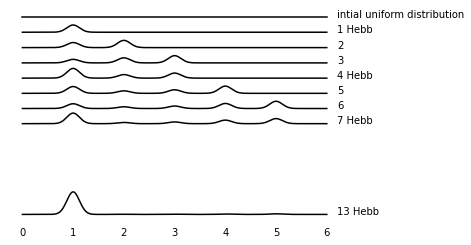

In [3]:
# add_trial plots what it's given then updates for the next trial
def add_trial(x, mu, sigma, to_plot, update, initial_y_offset, y_offset_step, trial_no, do_plot):
    tmp = stats.norm.pdf(x, mu, sigma)
    tmp /= sum(tmp)
    tmp = to_plot * (1.0 - update) + tmp * update

    if not do_plot:
        return tmp
    
    if(trial_no == 0):
      plt.annotate(
                'intial uniform distribution', 
                xytext=(6.2, initial_y_offset - trial_no * y_offset_step), xy=(6,initial_y_offset - trial_no * y_offset_step))
    
    
    if(trial_no > 0):
        if (trial_no -1) % 3 == 0:
            plt.annotate(
                str(trial_no) + ' Hebb', 
                xytext=(6.2, initial_y_offset - trial_no * y_offset_step), xy=(6,initial_y_offset - trial_no * y_offset_step))
    
        else:    
            plt.annotate(
                str(trial_no), 
                xytext=(6.2, initial_y_offset - trial_no * y_offset_step), xy=(6,initial_y_offset - trial_no * y_offset_step))
    
    plt.plot(x, to_plot + initial_y_offset - trial_no * y_offset_step, 'k-')

    return tmp


sigma = 0.125
mu = 0
update = 0.3
x_length = 1000
multiplier = 1000
ylim = 0.05
initial_y_offset = 0.06
y_offset_step = 0.012
#plt.xticks([], [])
plt.yticks([],[])
plt.tick_params('x', length = 0)
plt.box(False)



to_plot = np.ones(x_length)
to_plot /= sum(to_plot)





trials = np.array([1, 2, 3, 1, 4, 5, 1, 1]) # add_plot plots what its given and then updates
# so the last item isn't plotted until we call it again
#That means that the last 1 gets plotted in the blanks loop,

blanks = np.array([1,1,1,1,1]) # repetitions of the Hebb that aren't displayed


x = np.linspace(mu - 5 * sigma,  15 * sigma, x_length)
x = np.linspace(0,6 ,x_length)


for trial_no in range(len(trials)):
    to_plot = add_trial(x, trials[trial_no], sigma, to_plot, update, initial_y_offset, y_offset_step, trial_no, True)



for trial_no in blanks:
    to_plot = add_trial(x,1, sigma, to_plot, update, initial_y_offset, y_offset_step, trial_no, False)

trial_no = len(trials) + len(blanks)

to_plot = add_trial(x,1, sigma, to_plot, update, initial_y_offset, y_offset_step, trial_no, True)



plt.savefig('hebb_samples_figure2A.png', dpi = 500, bbox_inches='tight')









Bayes filter:

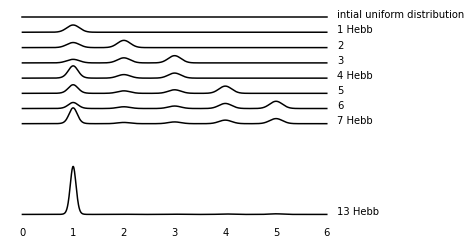

In [4]:
def add_trial_P(x, mu, sigma, to_plot, update, initial_y_offset, y_offset_step, trial_no, do_plot):
    tmp = stats.norm.pdf(x, mu, sigma)
    tmp /= sum(tmp)
    
    tmp = np.multiply(tmp, to_plot)
    tmp /= sum(tmp)
    
    
    tmp = to_plot * (1.0 - update) + tmp * update

    
    
    if not do_plot:
        return tmp
    
    if(trial_no == 0):
      plt.annotate(
                'intial uniform distribution', 
                xytext=(6.2, initial_y_offset - trial_no * y_offset_step), xy=(6,initial_y_offset - trial_no * y_offset_step))
    
    
    if(trial_no > 0):
        if (trial_no -1) % 3 == 0:
            plt.annotate(
                str(trial_no) + ' Hebb', 
                xytext=(6.2, initial_y_offset - trial_no * y_offset_step), xy=(6,initial_y_offset - trial_no * y_offset_step))
    
        else:    
            plt.annotate(
                str(trial_no), 
                xytext=(6.2, initial_y_offset - trial_no * y_offset_step), xy=(6,initial_y_offset - trial_no * y_offset_step))
    
    plt.plot(x, to_plot + initial_y_offset - trial_no * y_offset_step, 'k-')

    return tmp


sigma = 0.125
mu = 0
update = 0.3
x_length = 1000
multiplier = 1000
ylim = 0.05
initial_y_offset = 0.06
y_offset_step = 0.012
#plt.xticks([], [])
plt.yticks([],[])
plt.tick_params('x', length = 0)
plt.box(False)



to_plot = np.ones(x_length)
to_plot /= sum(to_plot)



trials = np.array([1, 2, 3, 1, 4, 5, 1, 1]) # add_plot plots what its given and then updates
# so the last item isn't plotted until we call it again
#That means that the last 1 gets plotted in the blanks loop,

blanks = np.array([1,1,1,1,1])

x = np.linspace(mu - 5 * sigma,  15 * sigma, x_length)
x = np.linspace(0,6 ,x_length)


for trial_no in range(len(trials)):
    to_plot = add_trial_P(x, trials[trial_no], sigma, to_plot, update, initial_y_offset, y_offset_step, trial_no, True)

for trial_no in blanks:
    to_plot = add_trial_P(x,blanks[trial_no], sigma, to_plot, update, initial_y_offset, y_offset_step, trial_no, False)

trial_no = len(trials) + len(blanks)
to_plot = add_trial_P(x,1, sigma, to_plot, update, initial_y_offset, y_offset_step, trial_no, True)



plt.savefig('hebb_samples_figure2B.png', dpi = 500, bbox_inches='tight')



